In [1]:
#Import Packages
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import os

In [2]:
#Dataset Location
os.chdir("D:\\DS\\Python DS\\Sample\\wine-quality\\")

In [3]:
#Dataset import - Model created with red and checked on white
# dataset = pd.read_csv('winequality-red.csv')
dataset = pd.read_csv('winequality-white.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
#Dataset Correlation
correlations = dataset.corr()['quality'].drop('quality')
print(correlations)

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64


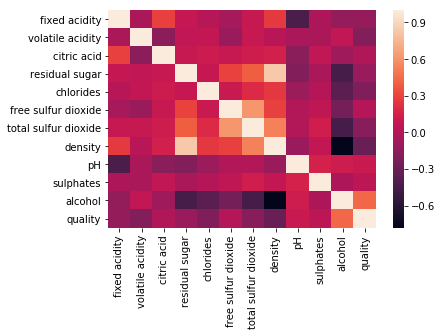

In [5]:
#Dataset HeatMap
sns.heatmap(dataset.corr())
plt.show()

In [6]:
#Check on Null value
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [7]:
#x and y value allocation
x = dataset.iloc[:,:-1]

In [8]:
y= dataset.iloc[:,11]

In [9]:
#Train, Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
#Apply Linear Regression Model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
#Prediction
y_pred = reg.predict(x_test)

In [12]:
y_pred

array([5.81014047, 5.63475704, 5.13628963, 5.77860609, 5.48594191,
       5.9425661 , 5.53210825, 6.6388866 , 6.25051111, 5.7465352 ,
       5.17945349, 6.16365406, 5.93098867, 4.97367971, 5.53576066,
       5.84013326, 5.85139702, 5.79367404, 5.78168197, 5.58330915,
       5.70988568, 5.540785  , 6.30227419, 6.46684069, 5.59957278,
       6.03317737, 6.0256422 , 5.62306954, 5.29471586, 5.32695908,
       5.56333442, 5.89324781, 6.50391077, 6.39288194, 6.27750294,
       5.61204096, 5.78535375, 6.78324825, 6.50844846, 5.5732117 ,
       5.63199843, 6.66123679, 6.32243429, 5.93531515, 5.22486877,
       5.67936905, 6.49196027, 5.47802229, 5.19996619, 6.25802611,
       5.89793662, 6.21009198, 6.36203834, 6.21875515, 6.18934166,
       6.7418689 , 6.46316754, 5.34731429, 5.45094223, 5.61336044,
       6.1754791 , 5.9180404 , 6.02097402, 6.41920398, 5.15203149,
       6.62907874, 6.04201437, 6.23013249, 4.752457  , 6.1422388 ,
       6.30172805, 6.15883384, 5.47355585, 5.50639857, 6.64486

In [13]:
#R2
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

-1.608295027450092

In [14]:
reg.coef_

array([ 6.64745247e-02, -1.98315340e+00,  5.31587806e-03,  8.17787657e-02,
       -8.59363744e-02,  3.39301222e-03, -2.21336630e-04, -1.46380326e+02,
        6.90797682e-01,  5.39762375e-01,  1.96780087e-01])

In [15]:
reg.intercept_

146.32841980352308

In [16]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
regd=DecisionTreeRegressor()
regd.fit(x_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [17]:
y_pred_regd = regd.predict(x_test)

In [18]:
y_pred_regd

array([5., 6., 6., 7., 5., 6., 6., 7., 5., 6., 5., 6., 6., 5., 5., 4., 6.,
       5., 6., 5., 6., 6., 7., 7., 5., 7., 6., 6., 5., 5., 5., 5., 7., 5.,
       6., 5., 4., 6., 7., 5., 5., 8., 6., 8., 6., 5., 7., 5., 5., 6., 7.,
       7., 7., 6., 6., 7., 6., 5., 5., 5., 7., 7., 6., 7., 5., 7., 6., 7.,
       5., 6., 7., 5., 5., 6., 7., 6., 5., 5., 8., 6., 6., 6., 5., 7., 6.,
       6., 5., 6., 6., 6., 6., 5., 6., 4., 5., 5., 5., 6., 6., 6., 8., 7.,
       7., 6., 5., 5., 6., 7., 6., 6., 6., 6., 7., 7., 7., 5., 5., 7., 8.,
       5., 6., 6., 7., 6., 6., 7., 4., 6., 5., 5., 5., 6., 7., 5., 6., 6.,
       7., 5., 5., 5., 5., 6., 6., 7., 8., 5., 7., 6., 5., 5., 5., 6., 6.,
       7., 5., 7., 5., 6., 5., 6., 6., 7., 6., 7., 8., 6., 5., 6., 5., 6.,
       6., 5., 5., 6., 6., 6., 6., 6., 4., 6., 7., 6., 5., 6., 6., 5., 5.,
       7., 7., 6., 6., 7., 6., 6., 4., 6., 5., 6., 5., 5., 6., 5., 6., 6.,
       6., 6., 7., 6., 5., 7., 6., 6., 7., 7., 6., 6., 6., 8., 5., 7., 6.,
       6., 8., 5., 6., 6.

In [19]:
#R2
r2_score(y_test, y_pred_regd)

0.19219220771166767

In [20]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
reg_forest = RandomForestRegressor(n_estimators=4)
reg_forest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
y_pred_reg_forest = reg_forest.predict(x_test)

In [22]:
y_pred_reg_forest

array([6.  , 5.5 , 5.5 , 5.75, 5.25, 5.75, 5.25, 5.75, 6.75, 5.5 , 5.  ,
       6.  , 6.  , 4.75, 4.75, 6.25, 6.25, 6.  , 6.  , 5.25, 5.5 , 5.25,
       6.  , 6.75, 5.75, 6.25, 6.5 , 5.75, 6.  , 5.  , 5.5 , 5.5 , 7.  ,
       5.5 , 6.75, 5.25, 5.5 , 6.5 , 7.25, 5.5 , 5.75, 6.25, 6.25, 7.25,
       6.25, 5.  , 6.5 , 5.5 , 5.  , 6.25, 5.5 , 6.5 , 6.5 , 6.25, 6.75,
       6.25, 6.5 , 5.5 , 4.5 , 5.25, 7.  , 6.  , 6.  , 6.75, 4.75, 6.  ,
       5.5 , 6.75, 5.25, 6.25, 5.75, 6.25, 5.75, 5.75, 6.75, 5.5 , 5.  ,
       6.  , 7.5 , 6.25, 5.75, 6.5 , 5.  , 6.  , 6.  , 5.5 , 5.25, 6.  ,
       5.75, 6.5 , 5.75, 5.25, 7.25, 4.75, 5.25, 5.  , 5.  , 5.5 , 6.  ,
       5.5 , 6.75, 6.75, 5.5 , 6.25, 6.  , 6.25, 6.25, 7.  , 6.  , 6.5 ,
       5.5 , 5.75, 6.75, 7.  , 5.75, 5.  , 5.25, 6.5 , 7.25, 5.25, 5.75,
       6.  , 6.5 , 6.  , 5.75, 6.5 , 4.75, 6.  , 5.  , 5.5 , 5.  , 6.  ,
       6.75, 6.  , 5.25, 6.  , 6.  , 5.  , 5.  , 5.  , 5.  , 6.75, 6.75,
       7.25, 7.75, 5.  , 6.  , 5.75, 5.25, 5.25, 5.

In [23]:
r2_score(y_test, y_pred_reg_forest)

0.43711433909219166

In [24]:
#Classification
#Logistic
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)

D:\DS\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\DS\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_pred_log = log.predict(x_test)

In [26]:
y_pred_log

array([6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 5, 7, 5, 6, 6, 6, 6, 6, 6, 7, 6, 5, 6, 6, 6, 6,
       5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6,
       6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6,
       6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 7, 6, 6, 6, 5, 5, 5, 5, 6, 7, 6,
       6, 6, 6, 5, 5, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6,
       6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6,
       6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5,

In [27]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_log)

0.5163265306122449

In [28]:
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
y_pred_knn = knn.predict(x_test)

In [30]:
#Accuracy
accuracy_score(y_test, y_pred_knn)

0.49081632653061225

In [31]:
#KNN
from sklearn.naive_bayes import GaussianNB
class_nb=GaussianNB()
class_nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
y_pred_nb=class_nb.predict(x_test)

In [33]:
#Accuracy
accuracy_score(y_test, y_pred_nb)

0.44387755102040816

In [34]:
#SVM - Linear
from sklearn.svm import SVC
class_linear=SVC(kernel='linear')
class_linear.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [35]:
y_pred_linear=class_linear.predict(x_test)

In [36]:
#Accuracy
accuracy_score(y_test, y_pred_linear)

0.5142857142857142

In [37]:
#SVM - RBF
from sklearn.svm import SVC
class_rbf=SVC(kernel='rbf')
class_rbf.fit(x_train,y_train)

D:\DS\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [38]:
y_pred_rbf=class_rbf.predict(x_test)

In [39]:
#Accuracy
accuracy_score(y_test, y_pred_rbf)

0.5704081632653061

In [40]:
#SVM - Sigmoid
from sklearn.svm import SVC
class_sigmoid=SVC(kernel='sigmoid')
class_sigmoid.fit(x_train,y_train)

D:\DS\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [41]:
y_pred_sigmoid=class_sigmoid.predict(x_test)

In [42]:
#Accuracy
accuracy_score(y_test, y_pred_sigmoid)

0.4520408163265306

In [43]:
# # #Entropy - Decision Tree
from sklearn.tree import DecisionTreeClassifier
class_tree=DecisionTreeClassifier(criterion="entropy")
class_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
y_pred_tree=class_tree.predict(x_test)

In [45]:
#Accuracy
accuracy_score(y_test, y_pred_tree)

0.6112244897959184

In [46]:
# # #Entropy - Decision Tree
from sklearn.tree import DecisionTreeClassifier
class_tree=DecisionTreeClassifier(criterion="entropy")
class_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
y_pred_tree=class_tree.predict(x_test)

In [48]:
#Accuracy
accuracy_score(y_test, y_pred_tree)

0.6153061224489796

In [49]:
from sklearn.ensemble import RandomForestClassifier
class_random = RandomForestClassifier(n_estimators=3, criterion="entropy")
class_random.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
y_pred_random=class_random.predict(x_test)

In [51]:
accuracy_score(y_test, y_pred_random)

0.5938775510204082

In [52]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cmlog=confusion_matrix(y_test, y_pred_log)
cmknn=confusion_matrix(y_test, y_pred_knn)
cmnb=confusion_matrix(y_test, y_pred_nb)
cmlinear=confusion_matrix(y_test, y_pred_linear)
cmrbf=confusion_matrix(y_test, y_pred_rbf)
cmsigmoid=confusion_matrix(y_test, y_pred_sigmoid)
cmtree=confusion_matrix(y_test, y_pred_tree)
cmrandom=confusion_matrix(y_test, y_pred_random)

In [53]:
(cmlog[0,0]+cmlog[1,1])/sum(sum(cmlog))

0.0

In [54]:
(cmknn[0,0]+cmknn[1,1])/sum(sum(cmknn))

0.0

In [55]:
(cmnb[0,0]+cmnb[1,1])/sum(sum(cmnb))

0.00816326530612245

In [56]:
(cmlinear[0,0]+cmlinear[1,1])/sum(sum(cmlinear))

0.0

In [57]:
(cmrbf[0,0]+cmrbf[1,1])/sum(sum(cmrbf))

0.0

In [58]:
(cmsigmoid[0,0]+cmsigmoid[1,1])/sum(sum(cmsigmoid))

0.0

In [59]:
(cmtree[0,0]+cmtree[1,1])/sum(sum(cmtree))

0.012244897959183673

In [60]:
(cmrandom[0,0]+cmrandom[1,1])/sum(sum(cmrandom))

0.012244897959183673